In [0]:
 from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Course code : CMPE-257 Sec 99, Group name : Insurgents_Sales Prediction **

Group Submission by

1.   Chaitrali Deshmukh(012501489)
2.   Prathyusha Kasibhatta(013774163) 
3.   Sandhya Gadgoli(013798759)
4.   Saylee Vyawahare(013801294)


Images for clustering and regression on different use cases: https://drive.google.com/open?id=1FXgSR010mzkyqTUFtBnae0WhbhXfWm8n


Forecasting is an important factor to plan the future effectively and efficiently. Sales forecast has very high influence on the performance of the company’s business and hence these sales forecasts can be used to estimate company’s success or performance in the coming year. Forecasting of retail sales helps retailer to take necessary measures to plan their budgets or investments in a period (monthly, yearly) among different product categories like women clothing, men clothing and other clothing and at the same time they can plan to minimize revenue loss from unavailability of products by investing accordingly.

The objective of this assignment is to understand the whole ML Life cycle which includes data cleaning, data preparation, model training and testing.




**Description of dataset: Walmart dataset**

Item_Identifier: 		Unique product ID

Item_Weight: 		Weight of the product

Item_Fat: 			Weather the product is low fat or not

Item_Visibility: 		The % of total display area of all the products in a store allocated to particular product 

Item_MRP:			Price of the product

Item_Type:			Category to which product belongs to

Outlet_Identifier:		Unique store ID 

Outlet_Establishment_Year: Year in which store was established 

Outlet_Size: 			Size of the store which describes area 

Outlet_Location_Type: Type of city in which store is located

Outlet_Type: 		Indicates whether is store is just grocery store or some supermarket.

Item_Outlet_Sales:	Sales of a product in a specific store. Outcome variable to predict

**List of use cases observed from the dataset**


It is seen that from our dataset, the variables that will have higher impact on the product’s sale price are: Item_Visibility , Item_Type , OutletSize , Outlet_Location_Type , MRP and Outlet_Type


Here we are trying to identify the most important variables and to define the best regression model for predicting out target variable Item_Outlet_Sales. 


1 Item_visibility and Item_Outlet_Sales , 

Comparison of parameters visibility against sales provide answers to questions like 
•	why in-store visibility matters 
•	What is the impact of item visibility on sales, 
•	how can sales of a commodity can be maximized by changing the item location in the stores. 
By observing the item visibility index and respective sales amount, we can use strategies that will boost visibility of item which spikes the sales over next spell.

2 Item_Fat_Content and Item_Type 
In our data we have these two types of Fat mentioned Regular and Low Fat.
Under Item type we have Breads, Breakfast, Bakingoods, Canned,Dairy,Frozen,Meat,Snack,Other seafoods..etc

To do the product categorization like fat free and regular food type, specific nutrient information is valuable aspect in making purchase that directly affect sales. The regression on data set for fat content provides useful narrative on what item type has how much quantity of fat. “Low Fat” products mostly have higher sales values than “Regular” products.Daily use products will generally have a higher tendency to sell as compared to the specific use products. 

3 Year and Sales 
 Another important Observing sales in specific year-This use case provides generic sales pattern on the sales in a specific year (not for a specific item/dept sales.)
Dataset chosen has collected sales data from the year 1985 to 2009, for different products across many stores in different locations. 


4 Outlet_Type and Item_Outlet_Sales
Based on outlet type of outlet with respective sales - We can examine the sales in different types of stores like Supermarket and in Grocery Store.


5 Item MRP and Sales
Observation of price with sales will give insights on “What type of item is sold most” ,How much money people are spending on each item. From the dataset values notice that  Item_Visibility is the feature with the lowest correlation with our target variable. Hence less visible the product is in the store the higher the price will be. 


6 Size of outlet and sales
Another factor that might affect the sales in any store is Size of the outlet which will indicate the capacity of the store to store items. Theoretically the size of store and sales are directly proportional.Findings from size of outlet like medium, small and large will help to explore more on predicting sales of each item at various type of stores.

**Data Cleaning & Preparation:**

1.	Load the dataset using Pandas.
2.	Drop the unnecessary columns
3.	Remove the Null values by taking median of rows
4.	Remove the missing values.
5.	Categorized the Outlet Size into small, medium and high columns


In [0]:
#importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#loading the dataset using pandas
dataset = pd.read_csv("/content/drive/My Drive/MLFall2019/Insurgents/walmart-recruiting-store-sales-forecasting/Walmart_Train.csv")
dataset.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
#removing the null values from the dataset

dataset = dataset.replace(np.nan, 0)

dataset.is(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Identify the number of clusters using Elbow method and apply Clustering**



In [0]:
#Taking two features for clustering
dataset1 = pd.read_csv("/content/drive/My Drive/MLFall2019/Insurgents/walmart-recruiting-store-sales-forecasting/Walmart_Train.csv")
X = dataset1.iloc[:, [5,11]].values

print(X)

[[ 249.8092 3735.138 ]
 [  48.2692  443.4228]
 [ 141.618  2097.27  ]
 ...
 [  85.1224 1193.1136]
 [ 103.1332 1845.5976]
 [  75.467   765.67  ]]


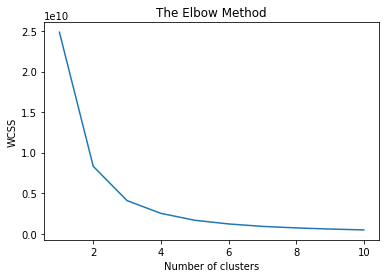

In [0]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

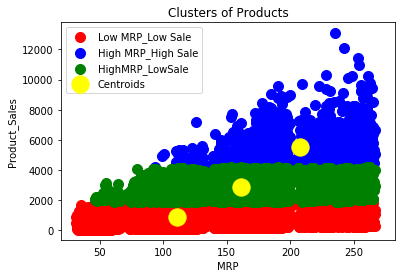

In [0]:
#Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Low MRP_Low Sale')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High MRP_High Sale')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'HighMRP_LowSale')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Products')
plt.xlabel('MRP')
plt.ylabel('Product_Sales')
plt.legend()
plt.show()


**Data visualization after clustering:**

For Clustering ,according to the graph plotted by elbow method we created 3 clusters and applied K-means algorithm on different use cases.

A.    Item visibility and product sales :-   The red color depicts cluster of products having High sales, green color de­­picts cluster of products having moderate sales and blue color depicts cluster of products having low sales.

B.    Item MRP and Product sales :- The red color depicts the cluster of products having Low sales at Low MRP, green color depicts cluster of products having Low sales at High MRP values and blue color depicts cluster of products having High sales at High MRP .

C.      Item weight and  Product sales :- The red color depicts cluster of products having Low sales, green color de­­picts cluster of products having moderate sales and blue color depicts cluster of products having high sales.


**Adding a new column for cluster number to enhance accuracy or precision of the dataset**

Based on clusters in the graph, we have categorized sales values to Low, Moderate and High into "Predict_Sales" and added it to dataset.

In [0]:
#Create a predictSales column and add it to the dataset
dataset['Predict_Sales'] = ""

def predictSales():
  x = []
  for i, saleRecord in enumerate(dataset['Item_Outlet_Sales']):
    if saleRecord < 2000:
      x.append("Low")
    elif saleRecord < 6000:
      x.append("Moderate")
    else:
      x.append("High")
  return x

#Categorize sales to Low, Moderate and High
dataset['Predict_Sales'] = predictSales()
dataset.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Predict_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Moderate
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Moderate
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800,Low
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low


**Applying Linear Regression on the dataset**

In [0]:
# dropping the unnecessary columns from the dataset for regression

dataset = dataset.drop(["Item_Identifier", "Item_Weight", "Item_Fat_Content", "Item_Visibility", "Item_Type", "Outlet_Identifier", "Outlet_Establishment_Year", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"], axis=1)

dataset.head(5)

,Item_MRP,Item_Outlet_Sales
0,249.8092,3735.1380
1,48.2692,443.4228
2,141.6180,2097.2700
3,182.0950,732.3800
4,53.8614,994.7052


In [0]:
#Sorting the column into X and Y

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [0]:
# Splitting the dataset into the Training set and Test set 
# Test will have 33% of total data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [0]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.3130187227395691

In [0]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

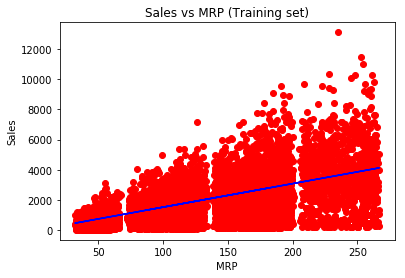

In [0]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sales vs MRP (Training set)')
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.show()

**Linear Regression on Item_visibility & Item_Sales **

![](https://drive.google.com/open?id=1lcJO0NRWShLyMPQOVItjtDHwzKNMA2gI)

**Data Visualizing after Linear Regression**

We have done linear regression on three different attributes which we think are the most important features in order to make good sale. After analyzing the relationship between item sales and item_MRP, we found that as the MRP increases the sales also gradually increases. In our linear regression graph, the line tries to predict item sales based on the MRP so for example if we have a product of 100$(dollars) its predicted sales would be around 1800$. In the second graph, we are trying to predict item_sales with respect to its visibility. However, the predictions for sales are not properly displayed in the graph. Based on the visibility, we cannot predict the actual sales of the products. Even if the products are visible to customers at all times, he/she might not buy it. It’s a very vague situation. Therefore, in this case, we feel that to predict sales we would need more concrete data and more prominent features. In this case, the prediction of the sales is purely based on item MRP and item visibility while on the other hand Sales is also greatly affected by other factors like time of the month, Holidays, discounts, weather conditions, store type, department etc.


Hence, we have decided to add one more dataset to enhance the probability of correct predictions. We have identified different latent manifolds which can help us to understand how and what factors should be considered to increase the overall store revenue.

**Latent Manifolds observed from the given datasets:**



Item MRP: actual retail price of the product

Item Visibility: visibility of the product in any store (e.g. row number on the shelves)

Item Type: what kind of product it is?

Item Weight: weight of the product

Store Type: Is it a small store or a big mall?

Time: What time of the day?

Holidays: Holidays, Long Weekends and Thanksgiving season 

Discounts: Promotions or sale

Weather Condition: Drastic weather conditions may also affect sales

Department Type: What kind of department it is? E.g. Beauty, Electronics, kitchen or Kids section




**Accuracy of the Regression Model:**

We have used RMSE (Root mean squared error) for calculating accuracy. In the scattered graph, we can see the red dots are actual values and the blue line is the set of predicted values drawn by our model. By taking the distances of all points to the line, and calculating mean and squaring them, we got RMSE value.

In [0]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 1434.2322207637158


**Data Enrichment:**

After identifying these latent manifolds, we thought to enrich our dataset by merging it with another dataset containing some of these important features. The final dataset looks like this:


In [0]:
#merging two datasets

df1 = pd.read_csv("/content/drive/My Drive/MLFall2019/Insurgents/walmart-recruiting-store-sales-forecasting/Walmart_Train.csv")

df2 =  pd.read_csv("/content/drive/My Drive/MLFall2019/Insurgents/walmart-recruiting-store-sales-forecasting/features.csv")

dfinal = pd.concat([df1,df2], axis=1)

dfinal.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.0,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.0,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.0,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1.0,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1.0,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
